<a href="https://colab.research.google.com/github/mdsiam135/research/blob/main/RF_70_15_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [71]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Yearbook of Agricultural Statistics/train1.csv")

In [72]:
# Step 1: Binning into 5 equal-frequency categories
labels = ['very low', 'low', 'medium', 'high', 'very high']
df['Production_Label'], bin_edges = pd.qcut(df['Production (M.Ton)'], q=5, labels=labels, retbins=True)


In [73]:
# Show bin ranges
print("Bin ranges for Production Categories:")
for i in range(len(bin_edges) - 1):
    print(f"{labels[i]}: {bin_edges[i]:.2f} to {bin_edges[i + 1]:.2f}")


Bin ranges for Production Categories:
very low: 0.00 to 545.38
low: 545.38 to 1452.00
medium: 1452.00 to 3050.00
high: 3050.00 to 6447.40
very high: 6447.40 to 544979.54


In [74]:
# Show label counts
print("\nCounts per Production Category:\n", df['Production_Label'].value_counts())


Counts per Production Category:
 Production_Label
low          1025
very low     1024
medium       1024
very high    1024
high         1023
Name: count, dtype: int64


In [75]:
# Step 2: Preprocessing
df.drop(columns=['Production (M.Ton)'], inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ['Crop', 'District']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [76]:
# Split features and target
X = df.drop(columns=['Production_Label'])
y = df['Production_Label']


In [77]:
# Step 3: Train/Validation/Test Split

# First split: 15% test, 85% remaining
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

# Second split: From remaining 85%, split 15/85 = 0.176 into validation (15% of original)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=42)



In [78]:
# Step 4: Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [79]:
# Step 5: Evaluation
# Validation
y_val_pred = clf.predict(X_val)
val_report = classification_report(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_macro_f1 = f1_score(y_val, y_val_pred, average='macro')

In [80]:
# Test
y_test_pred = clf.predict(X_test)
test_report = classification_report(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')

In [81]:
# Print reports
print("\n--- Validation Classification Report ---\n", val_report)
print("Macro F1 Score (Validation):", val_macro_f1)



--- Validation Classification Report ---
               precision    recall  f1-score   support

        high       0.70      0.71      0.71       153
         low       0.69      0.78      0.73       154
      medium       0.66      0.65      0.66       153
   very high       0.86      0.84      0.85       153
    very low       0.93      0.84      0.88       153

    accuracy                           0.76       766
   macro avg       0.77      0.76      0.77       766
weighted avg       0.77      0.76      0.77       766

Macro F1 Score (Validation): 0.7654296797488668


In [82]:
print("\n--- Test Classification Report ---\n", test_report)
print("Macro F1 Score (Test):", test_macro_f1)



--- Test Classification Report ---
               precision    recall  f1-score   support

        high       0.64      0.64      0.64       153
         low       0.66      0.68      0.67       154
      medium       0.61      0.59      0.60       153
   very high       0.83      0.84      0.84       154
    very low       0.88      0.86      0.87       154

    accuracy                           0.73       768
   macro avg       0.72      0.72      0.72       768
weighted avg       0.73      0.73      0.73       768

Macro F1 Score (Test): 0.7248489130913788


In [83]:
# Step 6: Plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.tight_layout()
    plt.show()

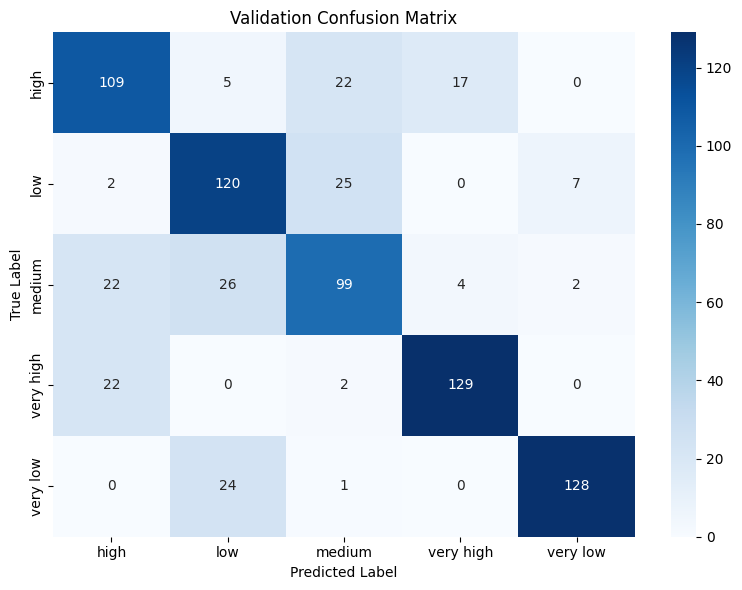

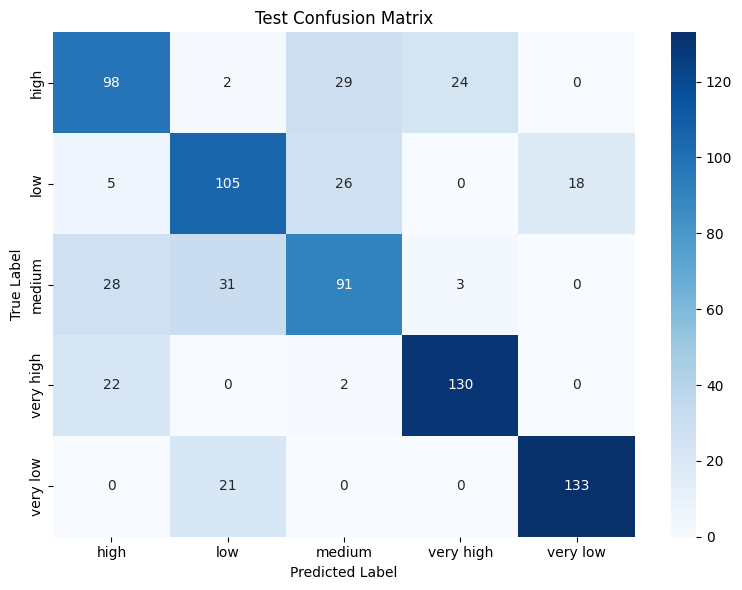

In [84]:
plot_confusion_matrix(val_conf_matrix, 'Validation Confusion Matrix')
plot_confusion_matrix(test_conf_matrix, 'Test Confusion Matrix')

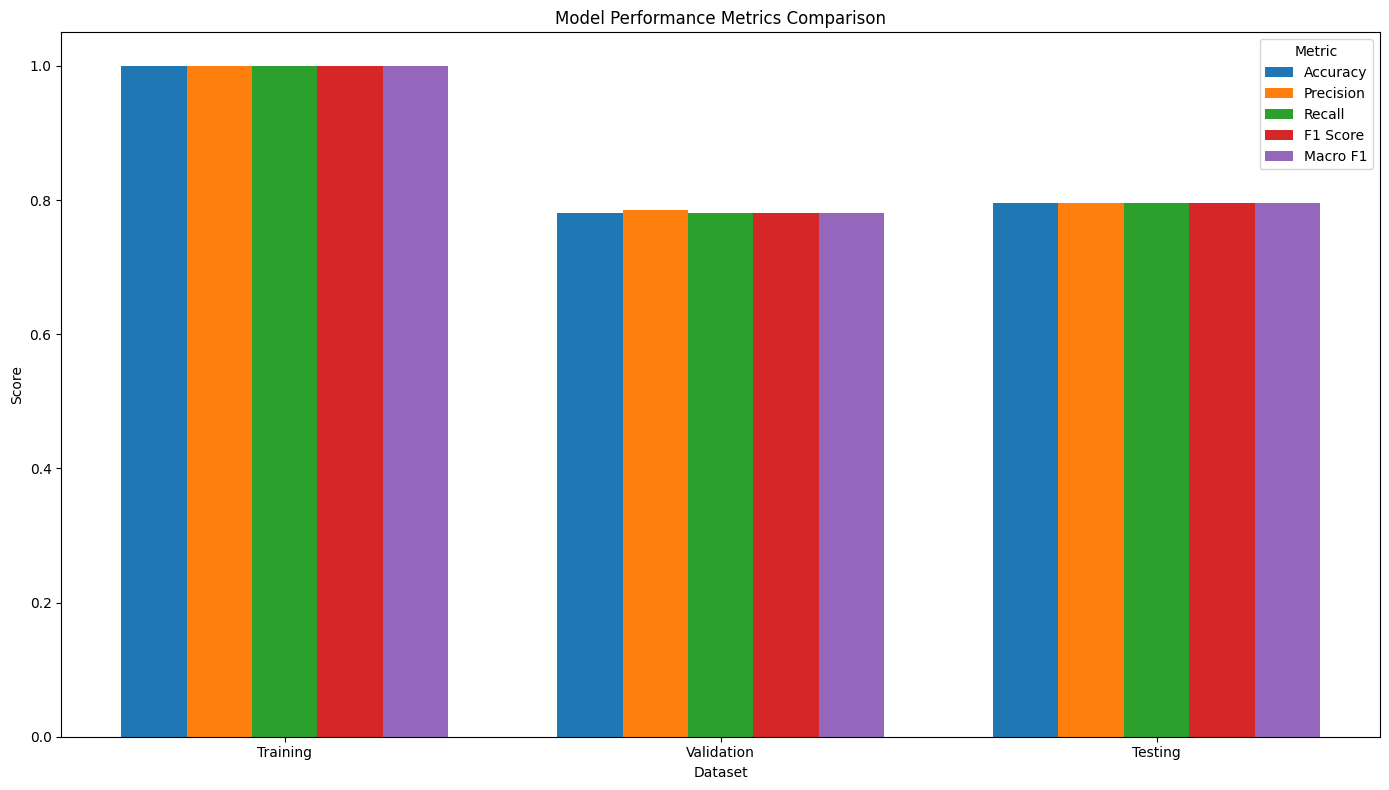

In [85]:
# Define the metrics and dataset names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Macro F1']
datasets = ['Training', 'Validation', 'Testing']

# Define the values from the image
# These are approximate values you might have used in the chart
values = [
    [1.0, 1.0, 1.0, 1.0, 1.0],       # Training
    [0.78, 0.785, 0.78, 0.78, 0.78], # Validation
    [0.795, 0.795, 0.795, 0.795, 0.795]  # Testing
]

# Convert to NumPy array for easier manipulation
values = np.array(values)

# Set up bar chart properties
bar_width = 0.15
x = np.arange(len(datasets))

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

for i in range(len(metrics)):
    ax.bar(x + i * bar_width, values[:, i], width=bar_width, label=metrics[i])

# Set x-axis labels and ticks
ax.set_xlabel('Dataset')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics Comparison')
ax.set_xticks(x + bar_width * 2)
ax.set_xticklabels(datasets)

# Add legend
ax.legend(title='Metric')

# Display the plot
plt.tight_layout()
plt.show()